In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn import metrics
import statsmodels.api as sm
from sklearn.metrics import accuracy_score
import lightgbm
from lightgbm import LGBMClassifier
from sklearn import svm
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [2]:
file = './data/Retrosheet_2010_2019/2010_to_2019_seasons.csv'
game_df = pd.read_csv(file)

game_col_del = '''VisitorGDP,VisitorCI,HomeGDP,HomeCI, DoubleHeader, DayOfWeek, VisitingTeamLeague, HomeTeamLeague, DayNight, CompletionInfo,ForfeitInfo, ProtestInfo, Duration, VisitorLineScore, HomeLineScore, UmpireHID, UmpireHName, Umpire1BID, Umpire1BName, Umpire2BID,Umpire2BName, Umpire3BID, Umpire3BName, UmpireLFID, UmpireLFName, UmpireRFID,UmpireRFName, VisitorManagerID, VisitorManagerName, HomeManagerID, HomeManagerName,WinningPitcherID, WinningPitcherName, LosingPitcherID, LosingPitcherNAme,SavingPitcherID, SavingPitcherName, GameWinningRBIID, GameWinningRBIName, VisitorBatting1Position, VisitorBatting2Position, VisitorBatting3Position,VisitorBatting4Position, VisitorBatting5Position, VisitorBatting6Position,VisitorBatting7Position, VisitorBatting8Position, VisitorBatting9Position,HomeBatting1Position, HomeBatting2Position, HomeBatting3Position,HomeBatting4Position, HomeBatting5Position, HomeBatting6Position,HomeBatting7Position, HomeBatting8Position, HomeBatting9Position,AdditionalInfo, AcquisitionInfo'''
game_col_del = game_col_del.replace(" ", "")
game_col_del = game_col_del.split(",")

game_df.drop(game_col_del,axis=1,inplace=True)


col_del = ['VisitorBatting1PlayerID', 'VisitorBatting1Name', 'VisitorBatting2PlayerID', 'VisitorBatting2Name', 'VisitorBatting3PlayerID', 'VisitorBatting3Name', 'VisitorBatting4PlayerID', 'VisitorBatting4Name', 'VisitorBatting5PlayerID', 'VisitorBatting5Name', 'VisitorBatting6PlayerID', 'VisitorBatting6Name', 'VisitorBatting7PlayerID', 'VisitorBatting7Name', 'VisitorBatting8PlayerID', 'VisitorBatting8Name', 'VisitorBatting9PlayerID', 'VisitorBatting9Name', 'HomeBatting1PlayerID', 'HomeBatting1Name', 'HomeBatting2PlayerID', 'HomeBatting2Name', 'HomeBatting3PlayerID', 'HomeBatting3Name', 'HomeBatting4PlayerID', 'HomeBatting4Name', 'HomeBatting5PlayerID', 'HomeBatting5Name', 'HomeBatting6PlayerID', 'HomeBatting6Name', 'HomeBatting7PlayerID', 'HomeBatting7Name', 'HomeBatting8PlayerID', 'HomeBatting8Name', 'HomeBatting9PlayerID', 'HomeBatting9Name']
game_df.drop(col_del,axis=1,inplace=True)
game_df = game_df.rename(columns={"VisitingTeam":"VisitorTeam","VisitingTeamGameNumber":"VisitorTeamGameNumber"})

In [3]:
game_df

,Unnamed: 0,Date,VisitorTeam,VisitorTeamGameNumber,HomeTeam,HomeTeamGameNumber,VisitorRunsScored,HomeRunsScore,LengthInOuts,ParkID,...,HomePO,HomeA,HomeE,HomePassed,HomeDB,HomeTP,VisitorStartingPitcherID,VisitorStartingPitcherName,HomeStartingPitcherID,HomeStartingPitcherName
0,0,20100404,NYA,1,BOS,1,7,9,51,BOS07,...,27,15,0,0,2,0,sabac001,CC Sabathia,beckj002,Josh Beckett
1,1,20100405,MIN,1,ANA,1,3,6,51,ANA01,...,27,10,0,0,1,0,bakes002,Scott Baker,weavj003,Jered Weaver
2,2,20100405,CLE,1,CHA,1,0,6,51,CHI12,...,27,9,0,0,1,0,westj001,Jake Westbrook,buehm001,Mark Buehrle
3,3,20100405,DET,1,KCA,1,8,4,54,KAN06,...,27,9,1,0,1,0,verlj001,Justin Verlander,greiz001,Zack Greinke
4,4,20100405,SEA,1,OAK,1,5,3,54,OAK01,...,27,9,4,0,1,0,hernf002,Felix Hernandez,sheeb001,Ben Sheets
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24292,24292,20190929,DET,161,CHA,161,3,5,51,CHI12,...,27,15,0,0,2,0,turns003,Spencer Turnbull,detwr001,Ross Detwiler
24293,24293,20190929,MIN,162,KCA,162,4,5,52,KAN06,...,27,4,0,0,1,0,perem004,Martin Perez,lopej004,Jorge Lopez
24294,24294,20190929,OAK,162,SEA,162,1,3,51,SEA03,...,27,8,0,0,0,0,roart001,Tanner Roark,dunnj002,Justin Dunn
24295,24295,20190929,NYA,162,TEX,162,1,6,51,ARL02,...,27,3,0,0,0,0,greec003,Chad Green,lynnl001,Lance Lynn


In [4]:
away_inning = game_df['LengthInOuts']//2
home_inning = game_df['LengthInOuts']- away_inning

game_df['VisitorOffInn'] = away_inning
game_df['VisitorDifInn'] = home_inning
game_df['HomeOffInn'] = home_inning
game_df['HomeDifInn'] = away_inning


game_df['Date'] = pd.to_datetime(game_df['Date'].astype(str), format='%Y%m%d')
game_df['current_year'] = game_df['Date'].dt.year
game_df['Home_team_won?'] = game_df['HomeRunsScore'] > game_df['VisitorRunsScored']
game_df['Visitor_team_won?'] = game_df['HomeRunsScore'] < game_df['VisitorRunsScored']

In [5]:
# Merging park factors
file = './park_factors.csv'
parkfactor_df = pd.read_csv(file, encoding='cp949')
game_df = pd.merge(game_df, parkfactor_df, on="HomeTeam")

In [6]:
# Attendence
my_attendence={'BOS':37755, 'LAA':45517, 'CWS':40615, 'KC':37903, 'OAK':56782, 'TEX':40300, 'ARI':48686, 'ATL':41084, 'CIN':42319,
       'HOU':41168, 'MIL':41900, 'NYM':41922, 'PIT':38747, 'WAS':41339, 'TB':42735, 'BAL':44970, 'DET':41083, 'COL':50144,
       'MIA':37442, 'SF':41265, 'CLE':34830, 'MIN':38544, 'SEA':47929, 'TOR':49282, 'CHC':41649, 'PHI':42792, 'SD':40209, 'STL':45494,
       'NYY':54251, 'LAD':56000}

for key, value in my_attendence.items():
  game_df.loc[game_df['HomeTeam']==key,'Attendence']=game_df.loc[game_df['HomeTeam']==key,'Attendence']/value

trend=1 #몇일 롤링
game_df[f'{trend}d_home_attendance'] = game_df.groupby(['current_year', 'HomeTeam'])['Attendence'].transform(lambda x: round(x.rolling(trend).mean().shift(periods=1, axis=0), 3))

In [7]:
bat_stat = [ 'TeamGameNumber','Team','AB','H','D','T','HR','RBI','SH','SF',
'HBP','BB','IBB','K','SB','CS','LOB','Pitchers',
'ER','TER','WP','Balks','PO','A','E','Passed','DB','TP','OffInn','DifInn','_team_won?']
pit_stat = ['H', 'D', 'T', 'HR', 'RBI', 'SH', 'SF', 'HBP', 'BB', 'IBB', 'K', 'LOB', 'ER','DB','AB']

In [8]:
select_stat = ['Date']
select_stat += ['Home'+i for i in bat_stat]+['Visitor'+i for i in pit_stat]
rename1 = {'Visitor'+i:'Pit'+i for i in pit_stat}
rename2 = {'Home'+i:i for i in bat_stat}

In [9]:
## Home 시각 
select_stat = ['Date']
select_stat += ['Home'+i for i in bat_stat]+['Visitor'+i for i in pit_stat]
rename1 = {'Visitor'+i:'Pit'+i for i in pit_stat}
rename2 = {'Home'+i:i for i in bat_stat}
Home = game_df.copy()
Home = Home[select_stat].rename(columns=rename1)
Home = Home.rename(columns=rename2)
# away 시각
select_stat = ['Date']
select_stat += ['Visitor'+i for i in bat_stat]+['Home'+i for i in pit_stat]
rename1 = {'Home'+i:'Pit'+i for i in pit_stat}
rename2 = {'Visitor'+i:i for i in bat_stat}
Visitor = game_df.copy()
Visitor = Visitor[select_stat].rename(columns=rename1)
Visitor = Visitor.rename(columns=rename2)

In [25]:
sep_team = pd.concat([Home,Visitor])
sep_team = sep_team.rename(columns={'PitDB':'DP'})

In [26]:
# 누적 값
col = ['AB', 'H', 'D', 'T', 'HR', 'RBI','DP',
       'SF', 'BB', 'K', 'SB', 'CS', 'LOB', 'Pitchers', 'ER', 'TER', 'WP','PitAB',
       'Balks', 'PO', 'A', 'E', 'Passed', 'DB', 'TP', 'OffInn', 'DifInn',
       'PitH', 'PitD', 'PitT', 'PitHR', 'PitRBI', 'PitSF',
       'PitBB', 'PitK', 'PitLOB', 'PitER']

In [27]:
# alpha = 0.1
# min_periods=2
# def sigma(alpha, period):
#     r = 1-alpha
#     return (r**(period)-1)/(r-1)

In [28]:
a = sep_team.copy()
sep_team['year']= sep_team.Date.dt.year
sep_team.sort_values(['year','TeamGameNumber'])
sep_team[col] = sep_team.groupby(['year','Team'])[col].transform(lambda x: x.expanding(1).sum())
sep_team[col] = sep_team[col].subtract(a[col])
sep_team = sep_team[sep_team['TeamGameNumber']>=10]

In [29]:
select_feature = ['Date', 'TeamGameNumber', 'Team','_team_won?']
# feature selection
select_feature += ['AB', 'H', 'D', 'T', 'HR', 'RBI','BB', 'K','DP', 'HBP','IBB','SF','SH',#bat stat
                    'ER','OffInn','DifInn' # game info
                    ,'PitAB','PitH', 'PitD', 'PitT', 'PitHR', 'PitRBI', 'PitSF', 'PitBB',"PitIBB","PitHBP" ,'PitK','PitLOB', 'PitER'
                    ]


In [30]:
sep = sep_team[select_feature] 

In [31]:
# H, OBP, SLG, ISO, Babip, RC, wOBA X, K, BB, RBI, K/B, HR   
# 타자 가공
sep['RC'] = ((sep['H']+sep['BB']+sep['HBP']-sep['DP'])
        *(sep['H']+2*sep['D']+3*sep['T']+4*sep['HR']+0.52*(sep['SF']+sep['SH'])+0.26*(sep['BB']+sep['HBP']-sep['IBB']))
        )/(sep['AB']*sep['AB']) #득점 생산


#사구,사사구, 고의사구 통합
sep['BB'] += sep['HBP']+sep['IBB']
sep['PitBB'] += sep['PitHBP']+sep['PitIBB']
#del sep['HBP'],sep['IBB'],sep['PitHBP'],sep['PitIBB']
# 희생번트, 희생플라이 통합
sep['PitSF'] += sep_team['PitSH']
sep['SF'] += sep['SH']
#del sep['SH'],sep['PitSH']

sep['K/B'] = sep['K']/(sep['BB']+0.5)
sep['PA'] = sep['AB'] - sep['BB'] - sep['SF'] # 타수
sep['Babip'] = (sep['H']+sep['D']+sep['T']) / (sep['PA']-sep['K']-sep['HR']-sep['SF']) # 인플레이 타구
sep['SLG'] = (sep['H']+2*sep['D']+3*sep['T']+4*sep['HR'])/sep['PA'] # 장타율
sep['H'] = sep['H']/sep['PA'] # 안타율
sep['D'] = sep['D']/sep['PA'] # 안타율
sep['T'] = sep['T']/sep['PA'] # 안타율
sep['HR'] = sep['HR']/sep['PA'] # 안타율
sep['BB'] = sep['BB']/sep['PA'] # 볼넷
sep['RBI'] = sep['RBI']/sep['TeamGameNumber'] # 득점

sep['OBP'] = (sep['H']+sep['BB']) #출루율
sep['OPS'] = sep['SLG']+sep['OBP'] #OPS
sep['GPA'] = (1.8*sep['OBP']+sep['SLG'])/4 #GPA(Gross Production Average) - park factor를 적용해야함
sep['ISO'] = sep['SLG'] - sep['H']


In [32]:
# 투수 가공
# PitH, PitOBP, PitSLG, PitOPS, PitHR, EAR, PitB, PitK, PitK/B, WHIP, kwERA
sep['ERA'] = sep['PitER']/sep['DifInn']
sep['TotalH'] = sep['PitH']+sep['PitD']+sep['PitT']+sep['PitHR']
sep['TotalBB'] = sep['PitBB']+sep['PitHBP']
sep['PitPA'] = sep['PitAB'] - sep['TotalBB'] - sep['PitSF']
sep['kwERA'] = (5.40-12*(sep['PitK'] - sep['TotalBB']))/sep['PitPA']
sep['WHIP'] = (sep['TotalH']+sep['TotalBB'])/sep['DifInn']
sep['PitK'] = sep['PitK']/sep['DifInn']
sep['PitB'] = sep['TotalBB']/sep['DifInn']
sep['PitK/B'] = sep['PitK']/(sep['PitB']+0.5)


sep['PitSLG'] = (sep['PitH']+2*sep['PitD']+3*sep['PitT']+4*sep['PitHR'])/sep['PitPA'] # 피장타율
sep['PitH'] = sep['PitH']/sep['PitPA'] # 피안타율
sep['PitOBP'] = (sep['TotalH']+sep['TotalBB']) / sep['PitAB'] #피출루율
sep['PitOPS'] = sep['PitSLG']+sep['PitOBP'] #피OPS
sep['PitHR'] /= sep['PitPA']

In [33]:

#temp = sep[['Date', 'TeamGameNumber', 'Team', '_team_won?','GPA', 'OPS','OBP','H','SLG','Babip','RC']]
temp = sep
game_log = game_df[['Date','VisitorTeam','HomeTeam','VisitorTeamGameNumber','HomeTeamGameNumber', 'ParkFactors', 'Attendence']]

game_log = game_log[game_log.VisitorTeamGameNumber>=10]
game_log = game_log[game_log.HomeTeamGameNumber>=10]

game_log = pd.merge(game_log,temp,left_on = ['Date','VisitorTeam'], right_on = ['Date','Team'],how='left')
game_log = pd.merge(game_log,temp,left_on = ['Date','HomeTeam'], right_on = ['Date','Team'],how='left')

game_log['year'] = game_log.Date.dt.year
train = game_log[game_log.year!=2019]
test = game_log[game_log.year==2019]

In [34]:
# 'H','OBP','SLG','ISO','Babip','RC','K','BB','RBI','K/B','HR','PitH','PitOBP','PitSLG','PitOPS','PitHR','EAR','PitB','PitK','PitK/B','WHIP'

In [35]:
# game_log[game_log['HomeTeam']=='SEA']['Date']

In [36]:
y_cols = ['_team_won?_x']
select = ['H','OBP','SLG','ISO','Babip','RC','K','BB','RBI','K/B','HR','PitH','PitOBP','PitSLG','PitOPS','PitHR','ERA','PitB','PitK','PitK/B','WHIP']
# select = ['H', 'D', 'T', 'HR', 'RBI', 'BB']
x_cols = [i+'_x' for i in select]
x_cols += [i+'_y' for i in select]
x_cols += ['ParkFactors', 'Attendence']
train = train.dropna()
test = test.dropna()


In [37]:
y_train = train[y_cols]*1
y_test = test[y_cols]*1

X_train = train[x_cols]
X_test = test[x_cols]
x_ = [i+'_x' for i in select]
y_ = [i+'_y' for i in select]
'''
diff
X_train = X_train[x_].to_numpy() - X_train[y_].to_numpy()
X_test = X_test[x_].to_numpy() - X_test[y_].to_numpy()
'''

'''
div
X_train = np.log(X_train[x_].to_numpy()) - np.log(X_train[y_].to_numpy()+1e-6)
X_test = np.log(X_test[x_].to_numpy()) - np.log(X_test[y_].to_numpy()+1e-6)
'''

'\ndiv\nX_train = np.log(X_train[x_].to_numpy()) - np.log(X_train[y_].to_numpy()+1e-6)\nX_test = np.log(X_test[x_].to_numpy()) - np.log(X_test[y_].to_numpy()+1e-6)\n'

In [38]:
'''
    Z-score normalization
'''
scaler = StandardScaler()
scaler.fit(train[x_cols])
X_train = scaler.transform(train[x_cols])
X_test = scaler.transform(test[x_cols])

In [39]:
X_train = train[x_cols]
y_train = train[y_cols]*1

X_test = test[x_cols]
y_test = test[y_cols]*1

model = sm.Logit(y_train,X_train)
results = model.fit()
print(results.summary())

y_hat = results.predict( X_train)
y_hat = list(map(round,y_hat))
print('Train accuracy = ', accuracy_score(y_train, y_hat))

y_hat = results.predict( X_test)
y_hat = list(map(round,y_hat))
print('Test accuracy = ', accuracy_score(y_test, y_hat))

Optimization terminated successfully.
         Current function value: 0.559772
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:           _team_won?_x   No. Observations:                13742
Model:                          Logit   Df Residuals:                    13704
Method:                           MLE   Df Model:                           37
Date:                Thu, 19 May 2022   Pseudo R-squ.:                  0.1897
Time:                        23:04:21   Log-Likelihood:                -7692.4
converged:                       True   LL-Null:                       -9493.7
Covariance Type:            nonrobust   LLR p-value:                     0.000
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
H_x             8.5151        nan        nan        nan         nan         nan
OBP_x           7.3557   1

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn import linear_model
# 파라메터 후보
logit_param = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'penalty': ['l1', 'l2']}

# 그리드 서치 진행
logit = linear_model.LogisticRegression()
logit_clf = GridSearchCV(logit, logit_param, scoring='accuracy', cv=5)
logit_results = logit_clf.fit(X_train, y_train.values.ravel())

train_score = logit_results.score(X_train, y_train)
test_score = logit_results.score(X_test, y_test)
print(logit_results.best_params_)
print(test_score)

In [85]:
param ={
            'num_leaves': [4,5,6,7,8],  
             'max_depth':[-1],
             'learning_rate': [0.1],
             "n_estimators": [100],
             "min_child_samples":[20,40,60,80],
             #'subsample': [0.1], 
             #'colsample_bytree': [1,0.95],
             #'reg_alpha': [1,0,1e-1],
             #'reg_lambda': [10,5,3,1,0,1e-1,1e-2],
            #'random_seed' : [0,1,2,3]
            'boosting':['gbdt']
             }
lgb =LGBMClassifier()
lgb_clf = GridSearchCV(lgb,param,scoring='accuracy', cv=5)
lgb_results = lgb_clf.fit(X_train, y_train.values.ravel())

train_score = lgb_results.score(X_train, y_train)
test_score = lgb_results.score(X_test, y_test)
print(lgb_results.best_params_)
print(test_score)

[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
{'boosting': 'gbdt', 'learning_rate': 0.1, 'max_depth': -1, 'min_child_samples': 80, 'n_estimators': 100, 'num_leaves': 4}
0.5783994795055303


In [86]:
rf_param ={'min_samples_split':[4,6,8,10,20],'max_depth':[-1,3,6,9,12,15]}
rf =RandomForestClassifier()
rf_clf = GridSearchCV(rf,rf_param,scoring='accuracy',cv=5)
rf_results = rf_clf.fit(X_train,  y_train.values.ravel())


train_score = rf_results.score(X_train, y_train)
test_score = rf_results.score(X_test, y_test)
print(rf_results.best_params_)
print(test_score)

{'max_depth': 3, 'min_samples_split': 20}
0.5816525699414443


In [87]:
param_range = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0] 
svm_param  = [{'C': param_range, 'kernel': ['linear']}, {'C': param_range, 'gamma': param_range, 'kernel': ['rbf']}]
svm_model =svm.SVC()
svm_clf = GridSearchCV(estimator=svm_model,param_grid=svm_param,scoring='accuracy',verbose=0,cv=5)
svm_results = svm_clf.fit(X_train, y_train.values.ravel())

train_score = svm_results.score(X_train, y_train)
test_score = svm_results.score(X_test, y_test)
print(svm_results.best_params_)
print(test_score)

In [50]:
!pip install pytorch-tabnet

In [51]:
col_tmp = X_test.columns
X_train=X_train.values
y_train=y_train.values
X_test=X_test.values
y_test=y_test.values
y_test = np.squeeze(y_test)
y_train = np.squeeze(y_train)

In [55]:
#Kfold 추가 방식
import torch
import torch.nn as nn
from pytorch_tabnet.tab_model import TabNetClassifier
from sklearn.model_selection import ParameterGrid, KFold

kf = KFold(n_splits=5, random_state=42, shuffle=True)
preds = []
scores  = []

for trn_idx,val_idx in kf.split(X_train):
    X_trn = X_train[trn_idx]
    y_trn = y_train[trn_idx]
    X_val = X_train[val_idx]
    y_val = y_train[val_idx]

    clf = TabNetClassifier(optimizer_fn=torch.optim.Adam,
                          optimizer_params=dict(lr=1e-2),
                          scheduler_params={"step_size":50,
                                            "gamma":0.9},
                          scheduler_fn=torch.optim.lr_scheduler.StepLR,
                          mask_type='sparsemax' # "sparsemax", entmax
                          )

    max_epochs = 200

    clf.fit(
        X_train=X_train, y_train=y_train,
        eval_set=[(X_trn, y_trn), (X_val, y_val)],
        eval_name=['train', 'val'],
        eval_metric=['auc','accuracy'],
        max_epochs=max_epochs , patience=10,
        batch_size=128, virtual_batch_size=64,
        num_workers=0,
        weights=1,
        drop_last=True,
    )

    scores.append(clf.best_cost)
    
    pred = clf.predict(X_test)
    preds.append(pred)
test_acc = np.mean(preds)
print('test_acc: ', test_acc)


Device used : cuda
epoch 0  | loss: 0.72657 | train_auc: 0.49951 | train_accuracy: 0.49859 | val_auc: 0.49778 | val_accuracy: 0.49982 |  0:00:05s
epoch 1  | loss: 0.69453 | train_auc: 0.51587 | train_accuracy: 0.47312 | val_auc: 0.50602 | val_accuracy: 0.47363 |  0:00:10s
epoch 2  | loss: 0.69401 | train_auc: 0.54163 | train_accuracy: 0.51751 | val_auc: 0.52155 | val_accuracy: 0.50055 |  0:00:16s
epoch 3  | loss: 0.69365 | train_auc: 0.54051 | train_accuracy: 0.51587 | val_auc: 0.53767 | val_accuracy: 0.5271  |  0:00:21s
epoch 4  | loss: 0.69235 | train_auc: 0.55348 | train_accuracy: 0.47994 | val_auc: 0.53388 | val_accuracy: 0.48308 |  0:00:26s
epoch 5  | loss: 0.6919  | train_auc: 0.54531 | train_accuracy: 0.53798 | val_auc: 0.54907 | val_accuracy: 0.5351  |  0:00:32s
epoch 6  | loss: 0.69063 | train_auc: 0.54735 | train_accuracy: 0.51924 | val_auc: 0.52574 | val_accuracy: 0.50673 |  0:00:37s
epoch 7  | loss: 0.69234 | train_auc: 0.55071 | train_accuracy: 0.54435 | val_auc: 0.5373  |

In [57]:
scores

[0.550745725718443,
 0.5572935612950164,
 0.5596797671033479,
 0.5687772925764192,
 0.5585880640465793]

In [54]:
import torch
import torch.nn as nn
from pytorch_tabnet.tab_model import TabNetClassifier

clf = TabNetClassifier(optimizer_fn=torch.optim.Adam,
                       optimizer_params=dict(lr=1e-2),
                       scheduler_params={"step_size":50,
                                         "gamma":0.9},
                       scheduler_fn=torch.optim.lr_scheduler.StepLR,
                       mask_type='sparsemax' # "sparsemax", entmax
                      )

max_epochs = 200

clf.fit(
    X_train=X_train, y_train=y_train,
    eval_set=[(X_train, y_train), (X_test, y_test)],
    eval_name=['train', 'test'],
    eval_metric=['auc','accuracy'],
    max_epochs=max_epochs , patience=10,
    batch_size=128, virtual_batch_size=32,
    num_workers=0,
    weights=1,
    drop_last=True,
)
print(clf.get_params().keys())

Device used : cuda
epoch 0  | loss: 0.7268  | train_auc: 0.52334 | train_accuracy: 0.47555 | test_auc: 0.52932 | test_accuracy: 0.49642 |  0:00:06s
Stop training because you reached max_epochs = 1 with best_epoch = 0 and best_test_accuracy = 0.49642
Best weights from best epoch are automatically used!
dict_keys(['cat_dims', 'cat_emb_dim', 'cat_idxs', 'clip_value', 'device_name', 'epsilon', 'gamma', 'input_dim', 'lambda_sparse', 'mask_type', 'momentum', 'n_a', 'n_d', 'n_independent', 'n_shared', 'n_steps', 'optimizer_fn', 'optimizer_params', 'output_dim', 'scheduler_fn', 'scheduler_params', 'seed', 'verbose'])


In [83]:
# from sklearn.metrics import roc_auc_score
# preds = clf.predict_proba(X_test)
# test_auc = roc_auc_score(y_score=preds[:,1], y_true=y_test)
# test_auc

In [28]:
# determine best accuracy for validation set
preds_valid = clf.predict(X_test)
test_acc = accuracy_score(preds_valid, y_test)

print(f"BEST ACCURACY SCORE ON TEST SET : {test_acc}")

BEST ACCURACY SCORE ON TEST SET : 0.5888093689004554


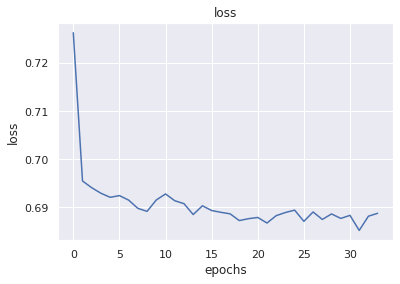

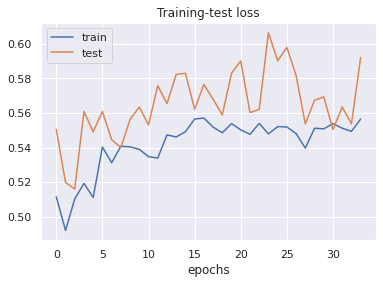

In [119]:
# plot losses
plt.plot(clf.history['loss'])
plt.title('loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

# plot accuracy
plt.plot(clf.history['train_accuracy'], label="train")
plt.plot(clf.history['test_accuracy'], label="test")
plt.title('Training-test loss')
plt.xlabel('epochs')
# plt.ylabel('Training-test loss')
plt.legend()
plt.show()

In [120]:
clf.feature_importances_

array([3.91871941e-03, 8.70198978e-02, 1.42459118e-01, 4.80766356e-07,
       3.13522481e-06, 2.17592766e-02, 4.39073358e-04, 8.59646477e-09,
       0.00000000e+00, 3.72612188e-04, 5.94590225e-05, 2.29358635e-01,
       3.60095225e-04, 1.85250328e-04, 2.74325188e-02, 0.00000000e+00,
       1.72774543e-04, 1.02541539e-01, 3.09313243e-02, 5.94853364e-02,
       4.80387723e-06, 2.42491520e-05, 0.00000000e+00, 9.52160610e-02,
       0.00000000e+00, 1.19647866e-03, 1.06298603e-05, 1.11032282e-04,
       2.10265127e-04, 2.91967894e-02, 5.92001023e-03, 0.00000000e+00,
       1.67090143e-03, 1.73133415e-02, 0.00000000e+00, 2.85089957e-02,
       1.20368734e-02, 2.70448603e-02, 6.31994422e-04, 4.64054322e-02,
       7.77415422e-07, 2.21320952e-02, 0.00000000e+00, 5.86515413e-03])

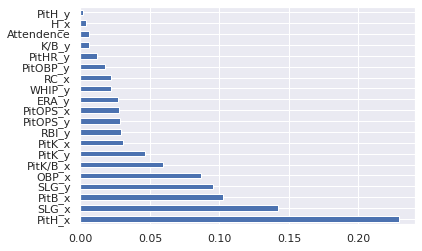

In [121]:
# find and plot feature importance
y_pred = clf.predict(X_test)
clf.feature_importances_
feat_importances = pd.Series(clf.feature_importances_, index=col_tmp)
feat_importances.nlargest(20).plot(kind='barh')

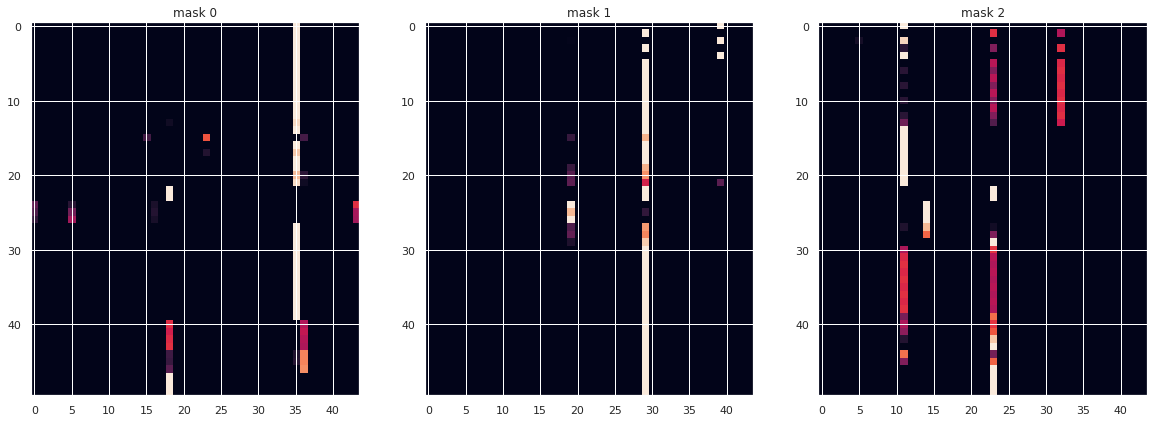

In [122]:
explain_matrix, masks = clf.explain(X_test)

fig, axs = plt.subplots(1, 3, figsize=(20,20))
for i in range(3):
    axs[i].imshow(masks[i][:50])
    axs[i].set_title(f"mask {i}")